# DSB-SC

length(t) = 5001
 Resolving package versions...


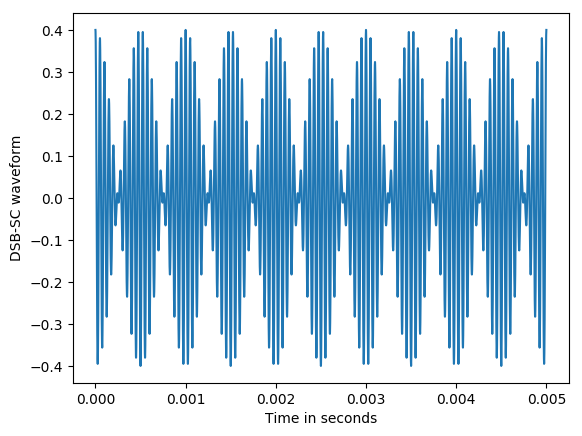

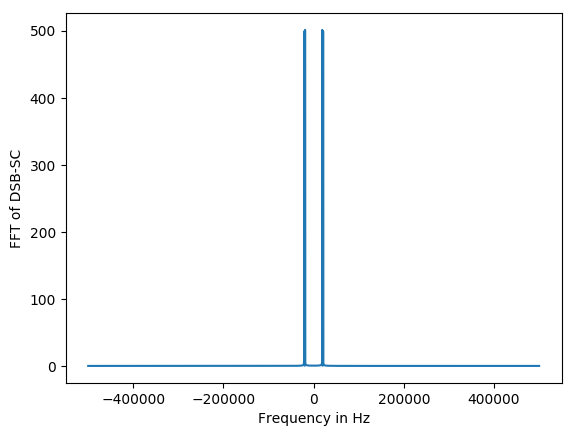

  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [13]:
using PyPlot 
# modulating wave
Δt = 0.00001 #time step
t = 0:Δt:0.005;#Define time from 0 

println("length(t) = ",length(t))

f0 = 1000
ω0 = 2*pi*f0;   # rad/s

f0 = 2*cos.(ω0*t);   # Create an array holding the sinusoid values

fc = 20000
ωc = 2*pi*fc;   # rad/s

fc = 2*cos.(ωc*t);   # Create an array holding the sinusoid values


phi= f0.*fc.*.1;

figure()
plot(t,phi);

xlabel("Time in seconds");
ylabel("DSB-SC waveform");

using Pkg
Pkg.add("FFTW")

using FFTW
PHI=fft(phi);

#Label the frequency axis in Hz
N = length(t);
Δf = 1/(N*Δt) #spacing in frequency domain

#create array of freq values stored in f_axis. First element maps to 0Hz
if mod(N,2)==0 #case N even
    f_axis = (-N/2:N/2-1)*Δf;    
else   # case N odd
    f_axis = (-(N-1)/2 : (N-1)/2)*Δf; 
end

figure()
plot(f_axis, fftshift(abs.(PHI)),"-");
xlabel("Frequency in Hz");
ylabel("FFT of DSB-SC");


# Square Wave as Modulating Signal

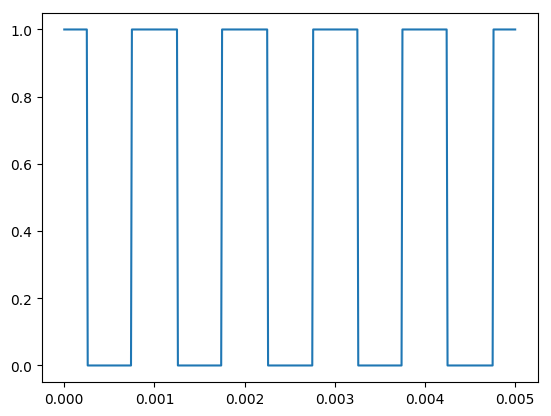

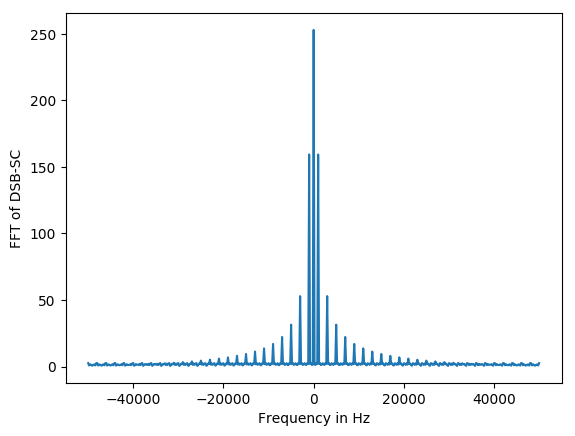

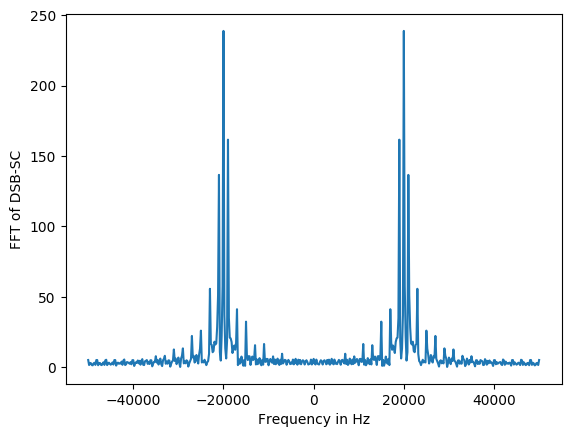

In [9]:
#use a square wave modulating signal
function pulse_train(t,Tpulse,Tperiod)
    N = length(t)
    result = zeros(N)
    for n= 1 :N
        t_wrap = mod(t[n]+Tperiod/ 2 ,Tperiod)-Tperiod/ 2
        result[n] = 1.0 *(abs(t_wrap)<=Tpulse/ 2 )
    end
    return result
end

s = pulse_train(t,0.0005,0.001)
w = s.*fc;

W = fft(w);

figure()
plot(t,s)

S = fft(s);

figure()
plot(f_axis, fftshift(abs.(S)),"-");
xlabel("Frequency in Hz");
ylabel("FFT of DSB-SC");

figure()
plot(f_axis, fftshift(abs.(W)),"-");
xlabel("Frequency in Hz");
ylabel("FFT of DSB-SC");

# DSB-LC

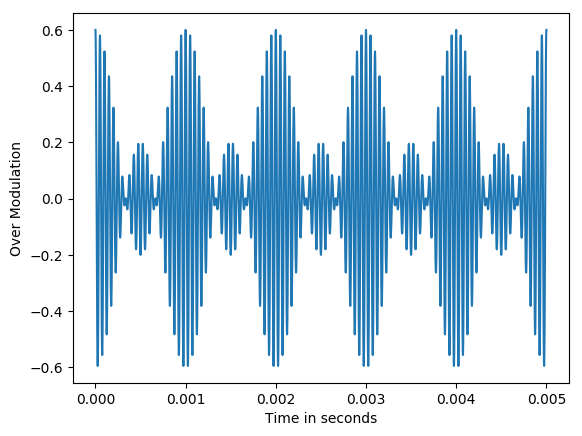

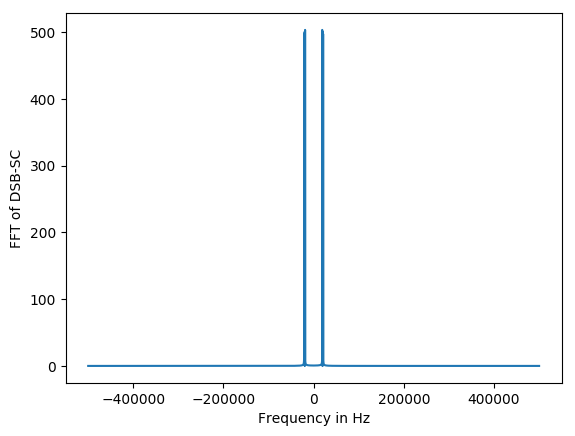

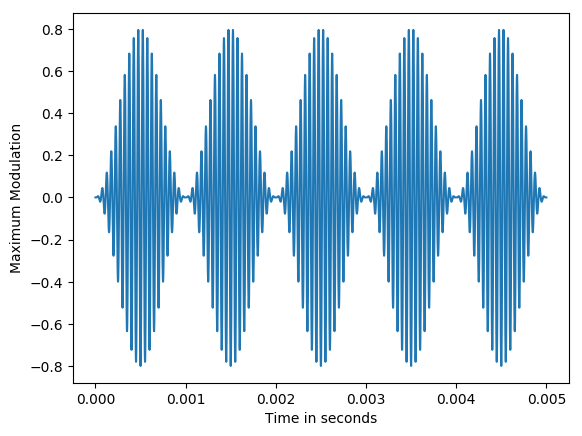

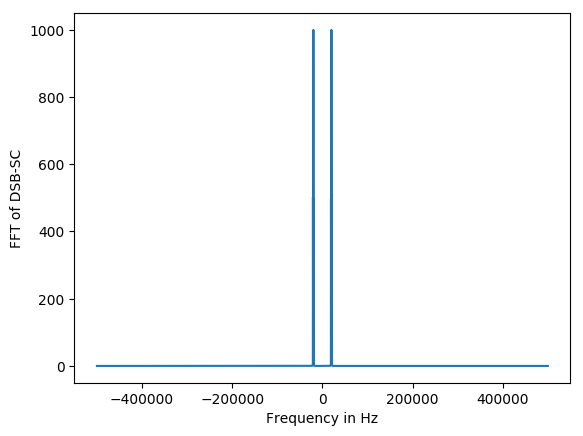

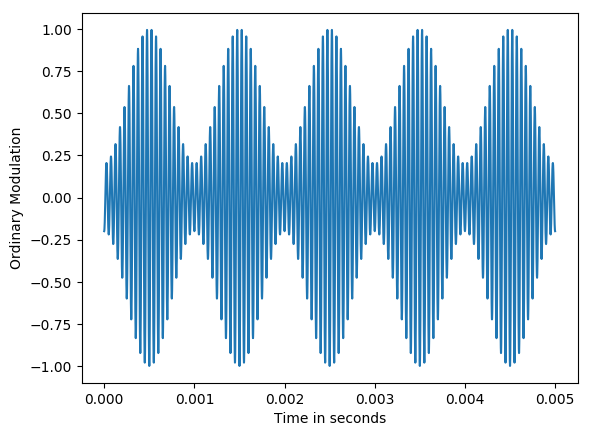

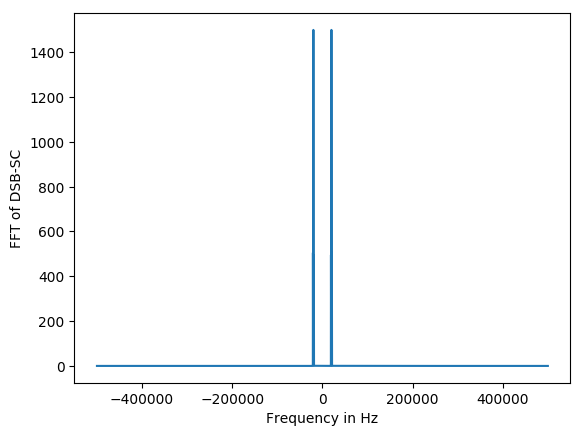

In [14]:
k=1;
philc=(f0.+k).*fc.*.1;

figure()
plot(t,philc);
xlabel("Time in seconds");
ylabel("Over Modulation");

PHILC = fft(philc);
figure()
plot(f_axis, fftshift(abs.(PHILC)),"-");
xlabel("Frequency in Hz");
ylabel("FFT of DSB-SC");

k0=-2;
philc0=(f0.+k0).*fc.*.1;

figure()
plot(t,philc0);
xlabel("Time in seconds");
ylabel("Maximum Modulation");

PHILC0 = fft(philc0);
figure()
plot(f_axis, fftshift(abs.(PHILC0)),"-");
xlabel("Frequency in Hz");
ylabel("FFT of DSB-SC");

k1=-3;
philc1=(f0.+k1).*fc.*.1;

figure()
plot(t,philc1);
xlabel("Time in seconds");
ylabel("Ordinary Modulation");

PHILC1 = fft(philc1);
figure()
plot(f_axis, fftshift(abs.(PHILC1)),"-");
xlabel("Frequency in Hz");
ylabel("FFT of DSB-SC");

# DSB-LC Modulation

length(t) = 501
 Resolving package versions...


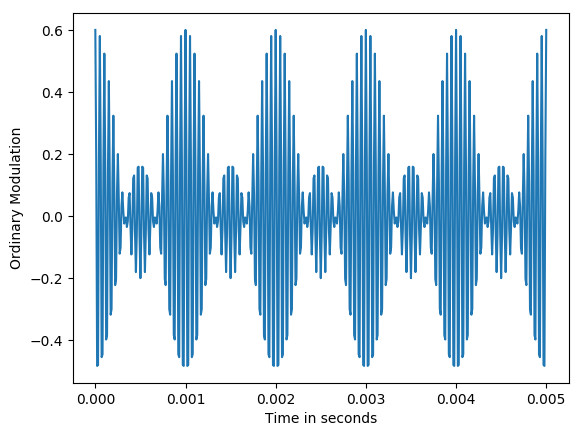

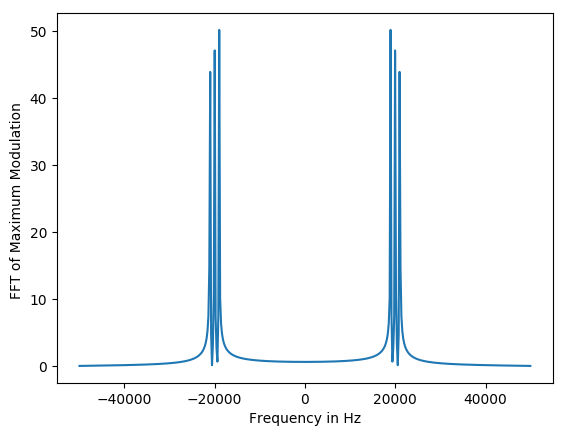

  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [19]:
using PyPlot 
# modulating wave
Δt = 0.00001 #time step
t = 0:Δt:0.005;#Define time from 0 

println("length(t) = ",length(t))

f0 = 1000
ω0 = 2*pi*f0;   # rad/s

f0 = 2*cos.(ω0*t) .+1;   # Create an array holding the sinusoid values

fc = 20000
ωc = 2*pi*fc;   # rad/s

fc = 2*cos.(ωc*t);   # Create an array holding the sinusoid values

phi= f0.*fc.*.1;

using Pkg
Pkg.add("FFTW")

using FFTW
PHI=fft(phi);

#Label the frequency axis in Hz
N = length(t);
Δf = 1/(N*Δt) #spacing in frequency domain

#create array of freq values stored in f_axis. First element maps to 0Hz
if mod(N,2)==0 #case N even
    f_axis = (-N/2:N/2-1)*Δf;    
else   # case N odd
    f_axis = (-(N-1)/2 : (N-1)/2)*Δf; 
end

figure()
plot(t,phi);
xlabel("Time in seconds");
ylabel("Ordinary Modulation");

figure()
plot(f_axis, fftshift(abs.(PHI)),"-");
xlabel("Frequency in Hz");
ylabel("FFT of Maximum Modulation ");

# Synchronous Demodulation of DSB-SC

length(t) = 501
 Resolving package versions...


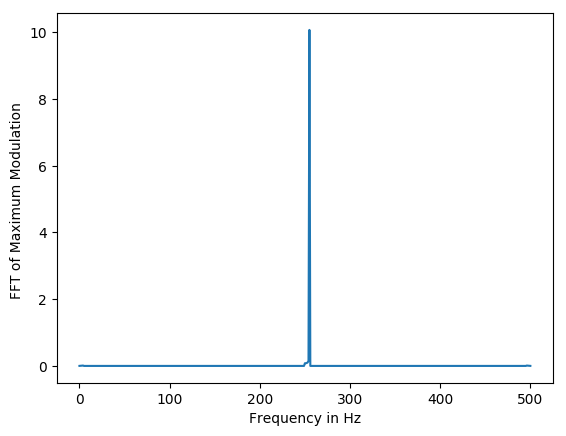

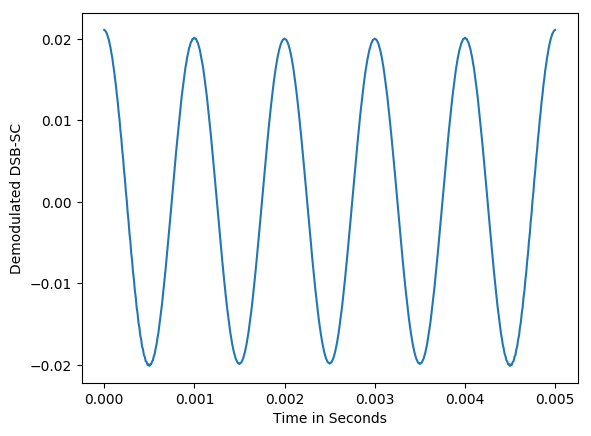

  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [27]:
using PyPlot 
# modulating wave
Δt = 0.00001 #time step
t = 0:Δt:0.005;#Define time from 0 

println("length(t) = ",length(t))

f0 = 1000
ω0 = 2*pi*f0;   # rad/s

f0 = 2*cos.(ω0*t);   # Create an array holding the sinusoid values

fc = 20000
ωc = 2*pi*fc;   # rad/s

fc = 2*cos.(ωc*t);   # Create an array holding the sinusoid values


phi= f0.*fc.*.1;

using Pkg
Pkg.add("FFTW")

using FFTW
PHI=fft(phi);

#Label the frequency axis in Hz
N = length(t);
Δf = 1/(N*Δt) #spacing in frequency domain

#create array of freq values stored in f_axis. First element maps to 0Hz
if mod(N,2)==0 #case N even
    f_axis = (-N/2:N/2-1)*Δf;    
else   # case N odd
    f_axis = (-(N-1)/2 : (N-1)/2)*Δf; 
end

w = phi.*fc.*.1;
using FFTW
W = fft(w);

# Define a rect(t) function - the input can be an N-elt array of t values
function rect(x)
    N = length(x)
    result = zeros(N)
    for n=1:N
        abs_t = abs(x[n]);    
        if abs_t >0.5
            result[n]=0.0
        elseif abs_t < 0.5
            result[n]=1.0
        else
            result[n]=0.5
        end
    end
    return result
end

Δω = 2*pi/(N*Δt)
ω = 0:Δω:(N-1)*Δω
f = ω/(2*pi)

B = 1000 # filter bandwidth

H = rect(ω/( 4 * π *B)) + rect( (ω .- π /Δt)/( 4 * π *B) )

Wfil = W.*H;

figure();
plot(fftshift(abs.(Wfil)),"-");
xlabel("Frequency in Hz");
ylabel("FFT of Maximum Modulation ");

wFIL = ifft(Wfil)

figure();
plot(t,wFIL);
xlabel("Time in Seconds");
ylabel("Demodulated DSB-SC");